In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Konfigurasi tampilan untuk plot (opsional tapi disarankan)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Ukuran plot default
plt.rcParams['font.size'] = 12 # Ukuran font default

In [2]:
# Path ke dataset Anda (relatif dari folder proyek utama)
file_path = '../data/Telco-Customer-Churn.csv'  # '../' untuk naik satu direktori dari 'notebooks'

try:
    df = pd.read_csv(file_path)
    print("✅ Dataset berhasil dimuat!")
except FileNotFoundError:
    print(f"❌ Error: File tidak ditemukan di {file_path}. Pastikan path dan nama file benar.")


✅ Dataset berhasil dimuat!


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
for column in df.columns:
    print(f"Kolom '{column}': {df[column].nunique()} nilai unik")

Kolom 'customerID': 7043 nilai unik
Kolom 'gender': 2 nilai unik
Kolom 'SeniorCitizen': 2 nilai unik
Kolom 'Partner': 2 nilai unik
Kolom 'Dependents': 2 nilai unik
Kolom 'tenure': 73 nilai unik
Kolom 'PhoneService': 2 nilai unik
Kolom 'MultipleLines': 3 nilai unik
Kolom 'InternetService': 3 nilai unik
Kolom 'OnlineSecurity': 3 nilai unik
Kolom 'OnlineBackup': 3 nilai unik
Kolom 'DeviceProtection': 3 nilai unik
Kolom 'TechSupport': 3 nilai unik
Kolom 'StreamingTV': 3 nilai unik
Kolom 'StreamingMovies': 3 nilai unik
Kolom 'Contract': 3 nilai unik
Kolom 'PaperlessBilling': 2 nilai unik
Kolom 'PaymentMethod': 4 nilai unik
Kolom 'MonthlyCharges': 1585 nilai unik
Kolom 'TotalCharges': 6531 nilai unik
Kolom 'Churn': 2 nilai unik


In [9]:
# Ganti 'Gender' dengan nama kolom kategorikal yang Anda minati
print(df['gender'].value_counts())
print(df['Partner'].value_counts())
# Lanjutkan untuk kolom kategorikal lainnya yang relevan

gender
Male      3555
Female    3488
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64


In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
import numpy as np
import pandas as pd

# Mengganti spasi kosong dengan NaN, lalu ubah ke tipe numerik
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Hitung median dari TotalCharges (setelah menjadi numerik)
median_total_charges = df['TotalCharges'].median()

# Imputasi nilai NaN dengan median (hindari inplace=True)
df['TotalCharges'] = df['TotalCharges'].fillna(median_total_charges)

# Verifikasi
print(f"Jumlah nilai hilang di TotalCharges setelah imputasi: {df['TotalCharges'].isnull().sum()}")


Jumlah nilai hilang di TotalCharges setelah imputasi: 0


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print(df['Churn'].value_counts())
print(df['Churn'].dtype)

Churn
0    5174
1    1869
Name: count, dtype: int64
int64


In [15]:
# Identifikasi kolom kategorikal yang perlu di-encode
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print(f"Kolom kategorikal sebelum encoding: {categorical_cols}")

# Hapus kolom 'customerID' jika ada dan tidak relevan
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')

# Terapkan One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True) # drop_first=True untuk menghindari multicollinearity

print(f"Shape setelah encoding: {df.shape}")
df.head() # Lihat beberapa baris pertama setelah encoding

Kolom kategorikal sebelum encoding: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Shape setelah encoding: (7043, 32)


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,5575-GNVDE,0,34,56.95,1889.50,0,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,0,2,53.85,108.15,1,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,7795-CFOCW,0,45,42.30,1840.75,0,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,9237-HQITU,0,2,70.70,151.65,1,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False


In [17]:
# Hitung korelasi antar kolom numerik saja
correlation_matrix = df.corr(numeric_only=True)

# Tampilkan korelasi terhadap variabel target 'Churn'
print("Korelasi dengan variabel target 'Churn':")
print(correlation_matrix['Churn'].sort_values(ascending=False))


Korelasi dengan variabel target 'Churn':
Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling_Yes                     0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService_Yes                         0.011942
gender_Male                             -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner_Yes                             -0.150448
Dependents_Yes                          -0.164221
TechSupport_Yes                         -0.164674
OnlineSec

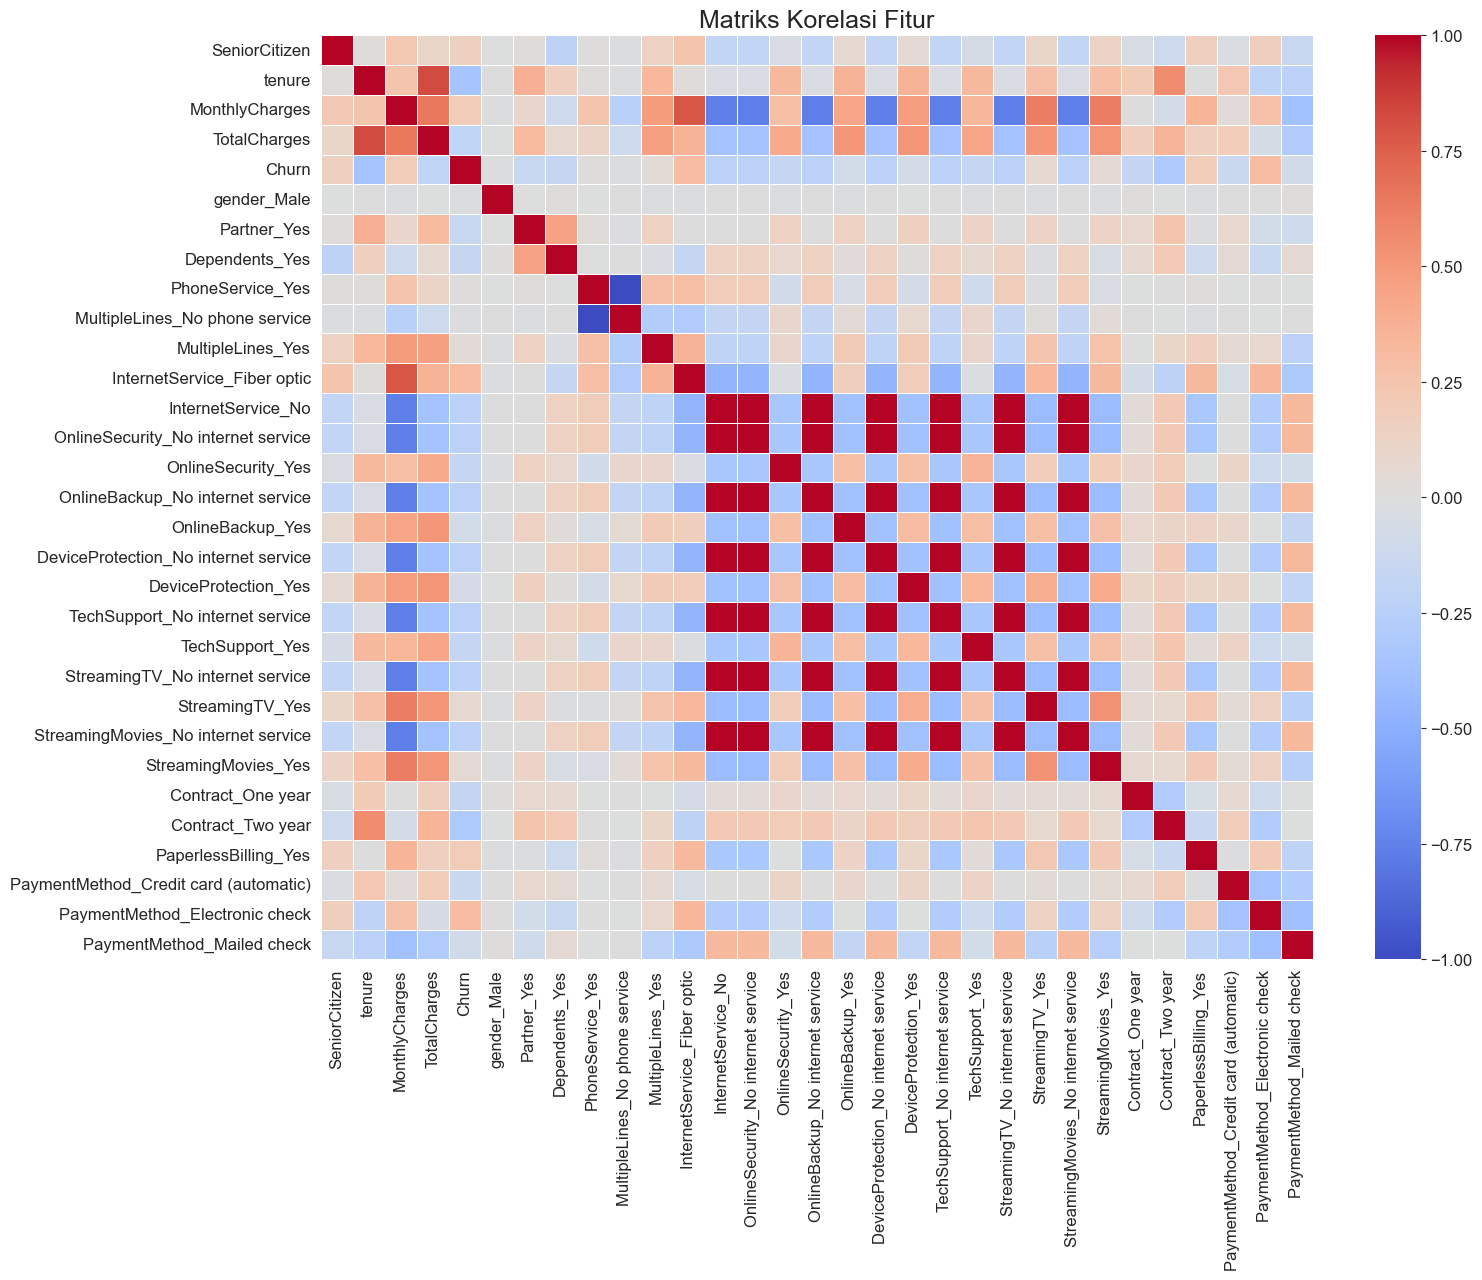

<Figure size 1000x600 with 0 Axes>

In [18]:
plt.figure(figsize=(16, 12)) # Sesuaikan ukuran figure
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriks Korelasi Fitur', fontsize=18)
plt.show()

# Simpan visualisasi
plt.savefig('../visualizations/correlation_heatmap.png')

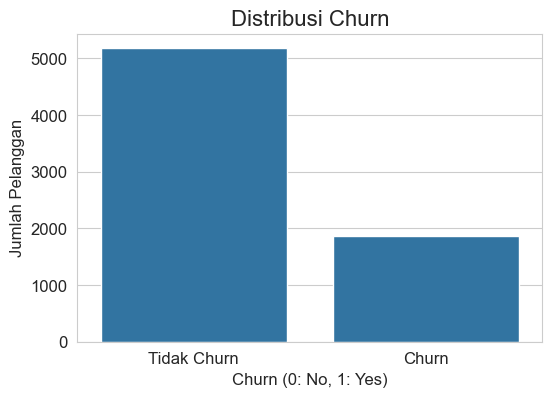

Persentase Tidak Churn: 73.46%
Persentase Churn: 26.54%


<Figure size 1000x600 with 0 Axes>

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribusi Churn', fontsize=16)
plt.xlabel('Churn (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Tidak Churn', 'Churn'])
plt.show()

churn_percentage = df['Churn'].value_counts(normalize=True) * 100
print(f"Persentase Tidak Churn: {churn_percentage[0]:.2f}%")
print(f"Persentase Churn: {churn_percentage[1]:.2f}%")

plt.savefig('../visualizations/churn_distribution.png')

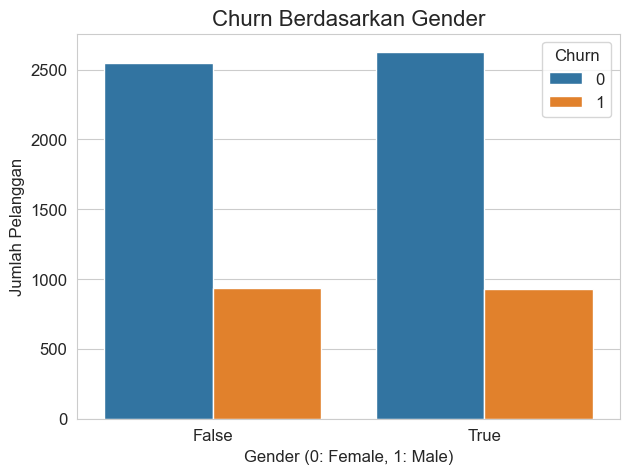

<Figure size 1000x600 with 0 Axes>

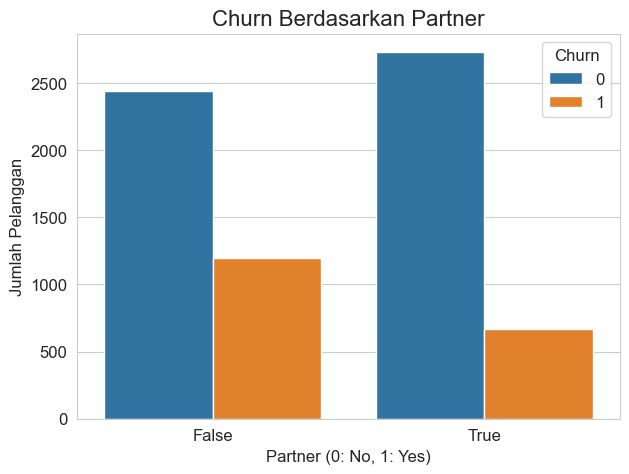

<Figure size 1000x600 with 0 Axes>

In [20]:
# Contoh untuk Gender
plt.figure(figsize=(7, 5))
sns.countplot(x='gender_Male', hue='Churn', data=df) # Sesuaikan dengan nama kolom hasil encoding
plt.title('Churn Berdasarkan Gender', fontsize=16)
plt.xlabel('Gender (0: Female, 1: Male)', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.show()

plt.savefig('../visualizations/churn_by_gender.png')

# Lakukan hal yang sama untuk fitur kategorikal penting lainnya seperti 'Partner', 'Dependents', 'PhoneService_Yes', dll.
# Contoh untuk Partner
plt.figure(figsize=(7, 5))
sns.countplot(x='Partner_Yes', hue='Churn', data=df)
plt.title('Churn Berdasarkan Partner', fontsize=16)
plt.xlabel('Partner (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.show()
plt.savefig('../visualizations/churn_by_partner.png')

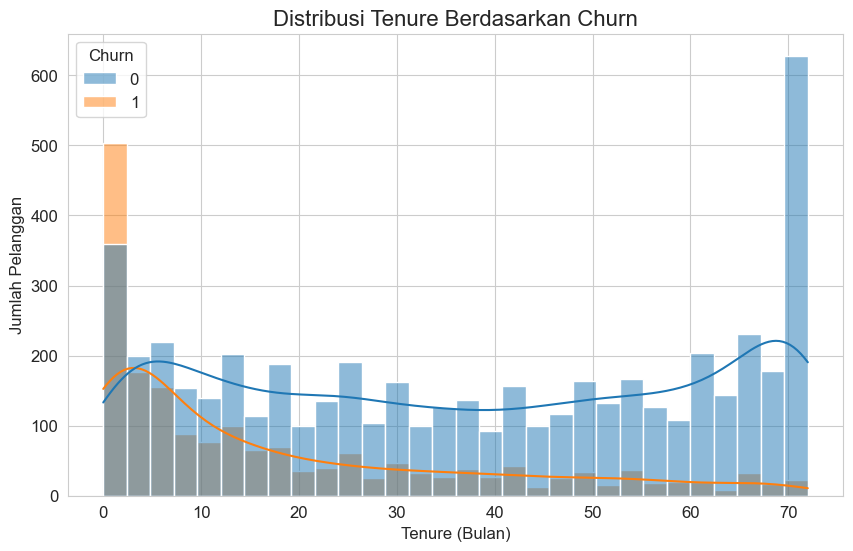

<Figure size 1000x600 with 0 Axes>

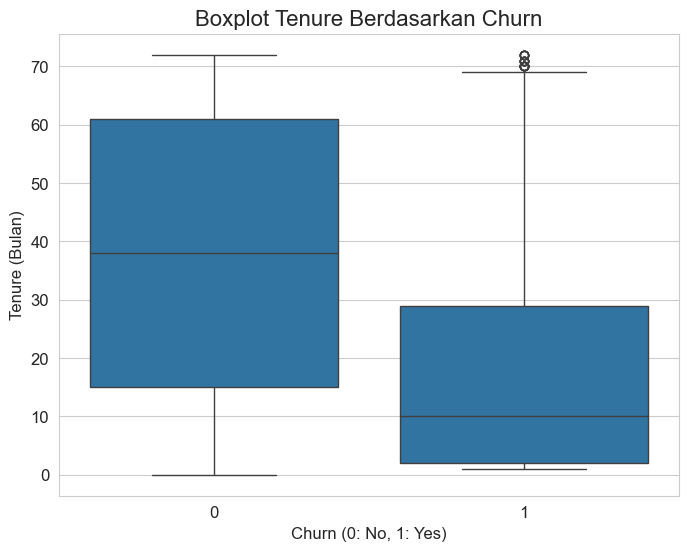

<Figure size 1000x600 with 0 Axes>

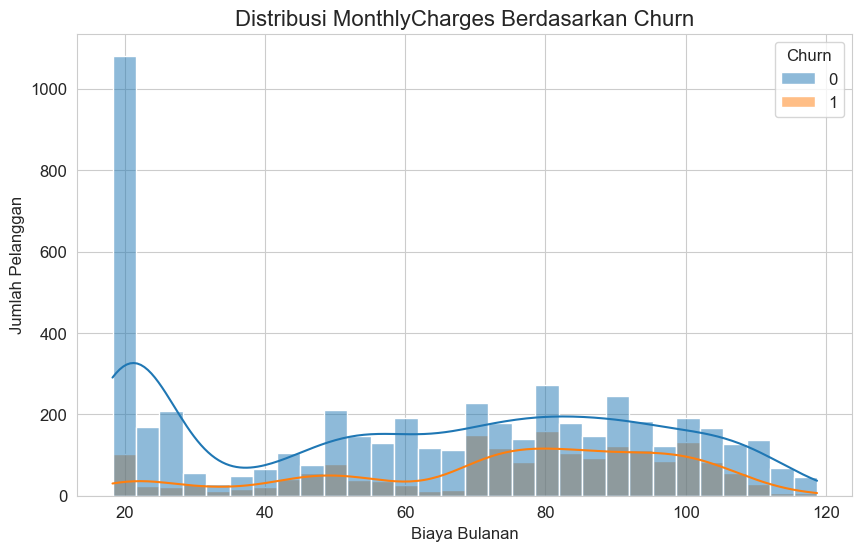

<Figure size 1000x600 with 0 Axes>

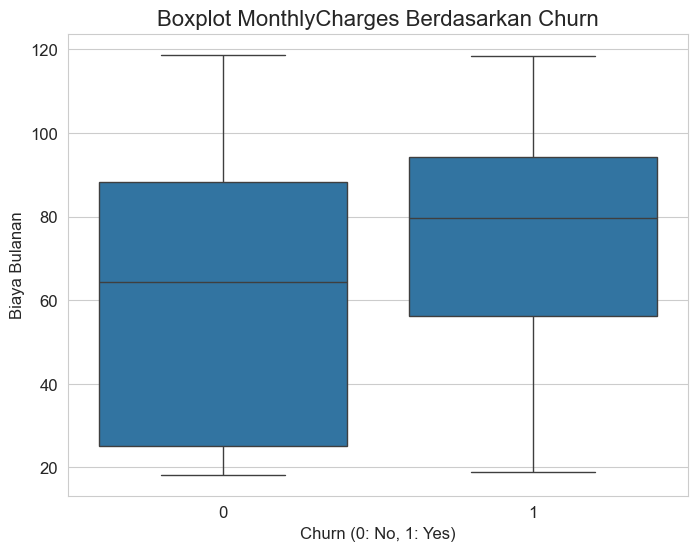

<Figure size 1000x600 with 0 Axes>

In [21]:
# Contoh untuk Tenure
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30)
plt.title('Distribusi Tenure Berdasarkan Churn', fontsize=16)
plt.xlabel('Tenure (Bulan)', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.show()
plt.savefig('../visualizations/churn_by_tenure_hist.png')

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Boxplot Tenure Berdasarkan Churn', fontsize=16)
plt.xlabel('Churn (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Tenure (Bulan)', fontsize=12)
plt.show()
plt.savefig('../visualizations/churn_by_tenure_boxplot.png')


# Contoh untuk MonthlyCharges
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, bins=30)
plt.title('Distribusi MonthlyCharges Berdasarkan Churn', fontsize=16)
plt.xlabel('Biaya Bulanan', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.show()
plt.savefig('../visualizations/churn_by_monthlycharges_hist.png')

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Boxplot MonthlyCharges Berdasarkan Churn', fontsize=16)
plt.xlabel('Churn (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Biaya Bulanan', fontsize=12)
plt.show()
plt.savefig('../visualizations/churn_by_monthlycharges_boxplot.png')